# Final Evaluation

In [112]:
import warnings
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import joblib

warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
# train_df = pd.read_csv('data/train_data.csv')
test_df = pd.read_csv('data/test_data.csv')

In [116]:
clf = joblib.load("./xgboost.joblib")

In [117]:
drop_col = ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 
'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'unix_time', 
'job_category', 'trans_date', 'trans_num', 'is_fraud']
input_features = [col for col in test_df.columns if col not in drop_col]
target_feature = ['is_fraud']

In [118]:
from utils.data import fit_model_and_get_predictions
model_and_predictions_dictionary = fit_model_and_get_predictions(clf, train_df, test_df, 
                                                                 input_features, "is_fraud",
                                                                 scale=False)
model_and_predictions_dictionary

{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, random_state=0, ...),
 'predictions_val': array([3.2481130e-05, 1.5223106e-05, 3.0998279e-05, ..., 4.2801494e-07,
        6.0383201e-07, 4.7110339e-07], dtype=float32),
 'training_execution_time': 11.97478199005127,
 'prediction_execution_tim

In [119]:
test_df['predictions']=(model_and_predictions_dictionary['predictions_val']>0.5).round()

In [120]:
from utils.eval import performance_assessment
performance_assessment(test_df)

,auc_roc,Average precision,F1 score
0,0.507,0.014,0.027


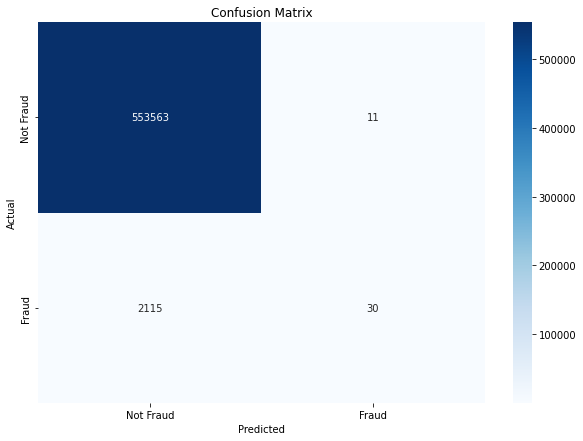

In [121]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(test_df['is_fraud'], test_df['predictions'])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()